In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [3]:
dataset = pd.read_csv("train.csv")

# 1) Data'nın büyüklüğünü bulun.


In [4]:
dataset.shape

(891, 12)

# 2) Data'nın nasıl göründüğünü gösterin. (İlk 5 satır veya son 5 satır)

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3) Data'nın sütunlarında hangi veri türleri bulunmaktadır?

In [6]:
dataset.info() #dataset tipleri hakkında detaylı bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataset.dtypes #sadece sütun isimleri ve sütun veri türü

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 4) Hangi sütunda, kaç tane eksik verimiz var?

In [8]:

missing_val_count_by_column = (dataset.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


# 5) Verimizin count, mean, std. dev, quartile gibi özelliklerini gösterin.

In [9]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 6) Verimizde inconsistent data entry var mı, kontrol edin.

In [10]:
consistent = dataset["Ticket"].unique()
inconsistent = len(dataset) - len(consistent)
print("Number of inconsistent data entryı:",inconsistent )

Number of inconsistent data entryı: 210


Evet, var.

# 7) Kategorik ve sayısal veriler için gerekli görsellerden çıkarım yapın. (Vizedeki gibi değil, gerçekten mantıklı olduğunu düşündüğünüz şeyleri gösterin. (Ne gereğinden az, ne de anlamsız derecede fazla))

In [11]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


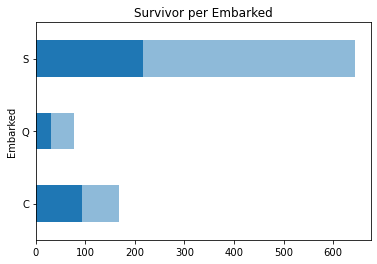

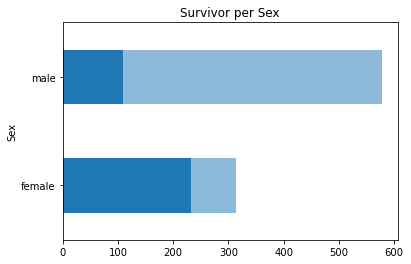

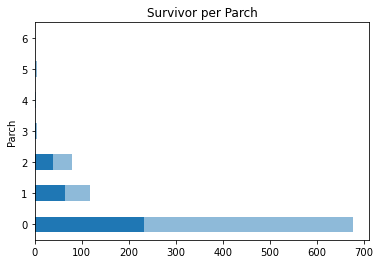

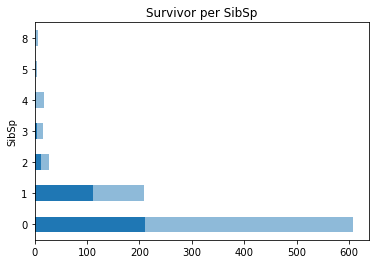

In [57]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def plot(column,t):
    df = pd.DataFrame()
    df['total'] = dataset.groupby(column).size()
    df['Survived'] = dataset.groupby(column).sum()['Survived']
    df['percentage']= round(df['Survived']/df['total']*100,2)
    
    df['Survived'].plot(kind= t)
    df['total'].plot(kind = t ,alpha= 0.5, title = 'Survivor per ' +str(column))
    plt.show()
    
plot('Embarked','barh')
plot('Sex','barh')

plot('Parch','barh')
plot('SibSp','barh')

# 8) Eksik verilerimiz için gerekli imputationları yapın

In [58]:
dataset_8 = dataset.fillna(0)  #ilk yöntem Nan yerine sıfır yazmak
dataset_8.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [59]:
#bir diğer çözüm yolu ise eksik verilerin olduğunu durumlarda uyguladığıumız ön işleme 
#kategorik verileri ayrı nümerikleri ayrı işliyoruz 
#en son birleşitiryoruz
#böylelikler her iki tür içinde eksik veriler giderliyor

from sklearn.impute import SimpleImputer

dataset_8 = dataset.copy()
for colname in dataset_8.select_dtypes("object"):
    dataset_8[colname], _ = dataset_8[colname].factorize()


cols_with_missing = [col for col in dataset_8.columns
                     if dataset_8[col].isnull().any()]
cols_with_missing

for col in cols_with_missing:
    dataset_8[col + '_was_missing'] = dataset_8[col].isnull()
   
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(dataset_8))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = dataset_8.columns
imputed_X_train_plus.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_was_missing
0,1.0,0.0,3.0,0.0,0.0,22.0,1.0,0.0,0.0,7.2500,-1.0,0.0,0.0
1,2.0,1.0,1.0,1.0,1.0,38.0,1.0,0.0,1.0,71.2833,0.0,1.0,0.0
2,3.0,1.0,3.0,2.0,1.0,26.0,0.0,0.0,2.0,7.9250,-1.0,0.0,0.0
3,4.0,1.0,1.0,3.0,1.0,35.0,1.0,0.0,3.0,53.1000,1.0,0.0,0.0
4,5.0,0.0,3.0,4.0,0.0,35.0,0.0,0.0,4.0,8.0500,-1.0,0.0,0.0


# 9) Eğer inconsistent data entry varsa, düzeltin.

In [60]:
dataset_9 = dataset.copy()

dataset_9.drop_duplicates(subset="Ticket", inplace=True)
dataset_9.dropna(subset=["PassengerId", "Ticket", "Sex", "Embarked"], inplace=True)
dataset_9.fillna(0, inplace=True)
dataset_9

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,0,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 10) Kategorik değişkenleri, sayısal hale getirin.

In [61]:
#verilerimizi kategorik formattında numeric değerler dönüştürüyoruz

dataset_10 = dataset.copy()
for colname in dataset_10.select_dtypes("object"):
    dataset_10[colname], _ = dataset_10[colname].factorize()
    
dataset_10.head(3)    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22.0,1,0,0,7.2500,-1,0
1,2,1,1,1,1,38.0,1,0,1,71.2833,0,1
2,3,1,3,2,1,26.0,0,0,2,7.9250,-1,0


# 11) Kendi sezginize göre yeni özellik değişkenleri yaratın. (Bu kısmın önemini tahmin edebiliyorsunuzdur.) Ekstra yarattığınız her özelliği neden yarattığınızı ve ne işe yarayacağını güzel bir şekilde yorumlayın/anlatın.

In [62]:


dataset_11 = dataset.copy()
mean = dataset_11["Age"].mean()
dataset_11["ratio to mean"] = dataset_11["Age"] / mean
dataset_11

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ratio to mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.740763
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.279499
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.875447
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.178486
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.178486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.909118
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.639750
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.875447


# 12) Mutual information skorlarına bakın. 

In [63]:
dataset_12 = dataset.copy()
df = dataset_12.fillna(0)
df = df.copy()


for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()
    
y = df.pop("Pclass")  

discrete_features = df.dtypes == int

In [64]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(df, y, discrete_features):
    mi_scores = mutual_info_regression(df, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df, y, discrete_features)
mi_scores[::3]  

Fare     0.806084
Age      0.077839
SibSp    0.028540
Name     0.000000
Name: MI Scores, dtype: float64

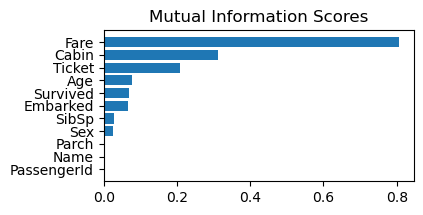

In [65]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(4, 2))
plot_mi_scores(mi_scores)

# 13) Şimdi tekrar 7. Adımdaki gibi, aslında sezginize göre mantıklı olması gereken, ancak iyi mutual information score vermeyen, değişkenlerin, tek başına hedef değişkenle veya başka değişkenlerle etkileşim halinde hedef değişkenle olan plotlarını çizdirin.(İçlerinden sadece kullanıcaklarınızı veya mantıklı gelenleri çizdirin.) Buradan çıkılan yolla, yeni özellik değişkenleri yaratabiliyorsanız yaratın.

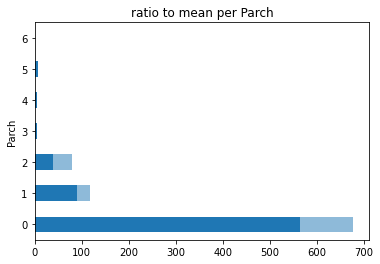

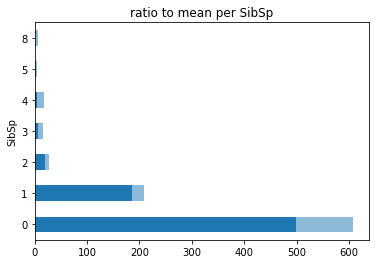

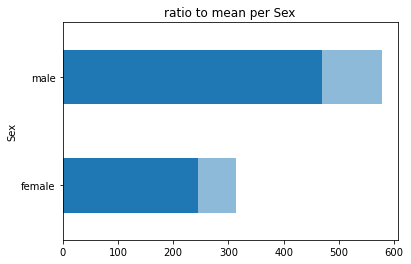

In [69]:

import matplotlib.pyplot as plt 
%matplotlib inline 

def plot(column,t):
    df = pd.DataFrame()
    df['total'] = dataset_11.groupby(column).size()
    df['ratio to mean'] = dataset_11.groupby(column).sum()['ratio to mean']
    df['percentage']= round(df['ratio to mean']/df['total']*100,2)
    
    df['ratio to mean'].plot(kind= t)
    df['total'].plot(kind = t ,alpha= 0.5, title = 'ratio to mean per ' +str(column))
    plt.show()
    

plot('Parch','barh')
plot('SibSp','barh')
plot('Sex','barh')

# 14) K-means clustering ile var olan değişkenlerden faydalanarak yeni değişkenler yaratabiliyorsanız yaratın. tek başına hedef değişkenle olan plotlarını çizdirin.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


In [34]:
dataset_14 = dataset_10.copy() 
                              

kmeans = KMeans(n_clusters=3)
dataset_14["Cluster"] = kmeans.fit_predict(df) 
dataset_14["Cluster"] = dataset_14["Cluster"].astype("int")
dataset_14.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cluster
669,670,1,1,669,1,NaN,1,0,537,52.0000,112,0,1
595,596,0,3,595,0,36.0,1,1,357,24.1500,-1,0,0
769,770,0,3,769,0,32.0,0,0,603,8.3625,-1,0,1
108,109,0,3,108,0,38.0,0,0,105,7.8958,-1,0,2
606,607,0,3,606,0,30.0,0,0,498,7.8958,-1,0,1


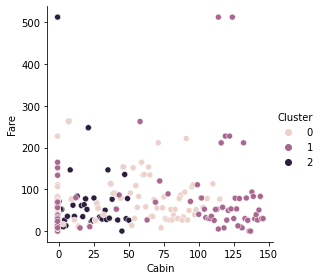

In [35]:
sns.relplot( x="Cabin", y="Fare", hue="Cluster", data=dataset_14, height=4,);

# 15) Principle component analysis ile değişkenlerimizi daha anlamlı hale getirebiliyor isek, yeni değişkenleri modele ekleyin. tek başına hedef değişkenle olan plotlarını çizdirin.

In [36]:
from sklearn.decomposition import PCA
dataset_15 = dataset_10.copy()
dataset_15= dataset_15.fillna(0)

features = ["Age", "SibSp", "Fare"]
y = dataset_15.pop('Pclass')
X = dataset_15.loc[:, features]

X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)




pca = PCA()
X_pca = pca.fit_transform(X_scaled)


component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3
0,0.279996,-0.379478,-0.476784
1,0.036278,1.168592,-0.299864
2,-0.552275,-0.414205,-0.052144
3,0.053554,0.778145,-0.400909
4,-0.854516,-0.125566,-0.347024


In [37]:
loadings = pd.DataFrame(
    pca.components_.T,  
    columns=component_names,  
    index=X.columns,  
)
loadings

,PC1,PC2,PC3
Age,-0.592041,0.560360,-0.579210
SibSp,0.772794,0.190838,-0.605286
Fare,0.228642,0.805964,0.546027


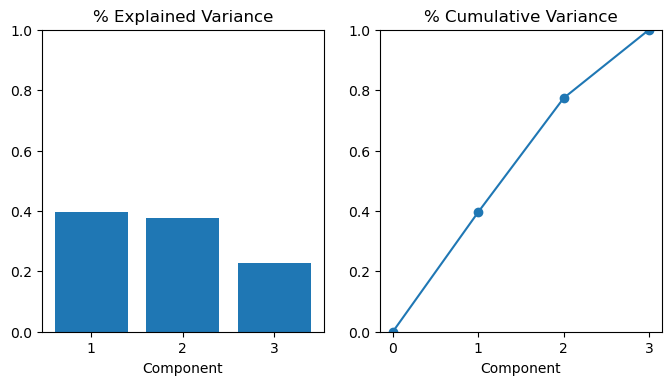

In [38]:
def plot_variance(pca, width=8, dpi=100):
    
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
   
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
   
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

# 16) İlk naif modelimizi oluşturun. (Decision Tree,Random Forest veya XGBoost)

In [39]:
from sklearn.ensemble import RandomForestClassifier

dataset_16 = dataset_10.copy()
features = ['Fare', 'Embarked', 'Survived']

X = dataset_16[features]
y = dataset_16.Pclass


rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(X, y)


RandomForestClassifier(random_state=1)

# 17) Permutation importance'larına bakın.

In [40]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split

dataset_16 = dataset_10.copy()
features = ['Fare', 'Embarked', 'Survived']
X = dataset_16[features]
y = dataset_16.Pclass

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
rfc_model = RandomForestClassifier(random_state=1).fit(train_X, train_y)

perm = PermutationImportance(rfc_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())


Weight,Feature
0.4843 ± 0.0740,Fare
0.0861 ± 0.0143,Embarked
0.0161 ± 0.0309,Survived


# 18) SHAP değerlerine bakın.(Shap values,2D partial Dependence Plots,Summary plots, Shap dependence Contribution plots) Bunları yorumlayın.

Veri kümesinin tek bir satırı için SHAP değerlerine bakacağız (7. satırı keyfi olarak seçtik). Bağlam için, SHAP değerlerine bakmadan önce ham tahminlere bakacağız.

In [41]:
row_to_show = 7
data_for_prediction = val_X.iloc[row_to_show]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rfc_model.predict_proba(data_for_prediction_array)

array([[1., 0., 0.]])

In [42]:
import shap  


explainer = shap.TreeExplainer(rfc_model)


shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

Summary plot

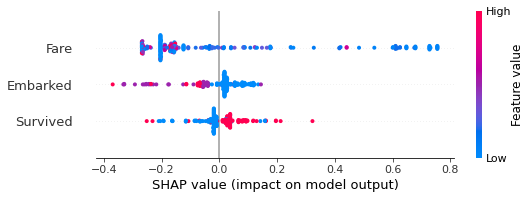

In [43]:
import shap  


explainer = shap.TreeExplainer(rfc_model)


shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values[1], val_X)

yorum: SHAP değerlerinin hesaplanması yavaş olabilir. Bu veri kümesi küçük olduğu için burada sorun değil. Ancak bunları makul boyutta veri kümeleriyle çizmek için çalıştırırken dikkatli olmak isteyeceksiniz. Bunun istisnası, SHAP'nin bazı optimizasyonlara sahip olduğu ve dolayısıyla çok daha hızlı olan bir xgboost modelinin kullanılmasıdır

Shap dependence Contribution plots

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


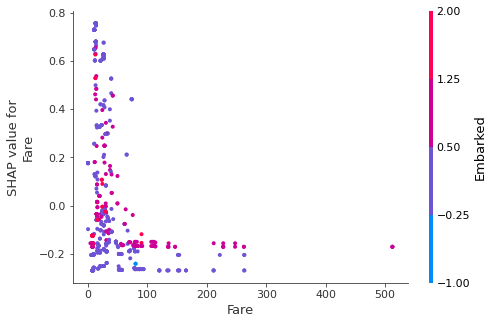

In [44]:
import shap  

explainer = shap.TreeExplainer(rfc_model)


shap_values = explainer.shap_values(X)


shap.dependence_plot('Fare', shap_values[1], X)

yorum: Tek bir özelliğin tahminleri nasıl etkilediğini göstermek için daha önce Kısmi Bağımlılık Grafiklerini kullandık. Bunlar, birçok gerçek dünya kullanım durumu için anlayışlı ve alakalı. Ayrıca, biraz çaba ile teknik olmayan bir kitleye açıklanabilirler. SHAP bağımlılığı katkı grafikleri, PDP'lere benzer bir içgörü sağlar, ancak çok daha fazla ayrıntı eklerler.

# 19) Yine yeni özellik adına bir fikir verdiyse kullanın. Mutual information skoruna bakın.

In [70]:
#11.soruda yeni özellik eklediğimiz dataseti kullanarak Mutual information skorlarına bakıldı

df_11 = dataset_11.fillna(0)
df = df_11.copy()

#verilerimizi kategorik formattında numeric değerler dönüştürüyoruz
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()
    
y = df.pop("ratio to mean")     

discrete_features = df.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(df, y, discrete_features):
    mi_scores = mutual_info_regression(df, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df, y, discrete_features)
mi_scores[::3]  

Age            3.659094
Pclass         0.132804
Ticket         0.053286
PassengerId    0.000000
Name: MI Scores, dtype: float64

# 20) Herhangi bir data leakage endişesi yaşıyor musunuz? Data leakage türleri nelerdir ve hangi durumlarda görülür, birer örnek verin.

Veri setimde ve bundan önceki sorularda veri sızıntısı gibi bir endişe yaşamadım.

- Data sızıntısı, eğitim verileriniz hedef hakkında bilgi içerdiğinde gerçekleşir, ancak model tahmin için kullanıldığında benzer veriler mevcut olmayacaktır. Bu, eğitim setinde (ve muhtemelen doğrulama verilerinde bile) yüksek performansa yol açar, ancak model üretimde düşük performans gösterecektir. Başka bir deyişle, sızıntı, siz modelle karar vermeye başlayana kadar bir modelin doğru görünmesine neden olur ve ardından model çok yanlış hale gelir. 
İki ana sızıntı türü vardır: Hedef sızıntısı(target leakage) ve eğitim-test kontaminasyonu( train-test contamination.)

- 1) Hedef sızıntısı, tahmincileriniz, tahminde bulunduğunuz sırada mevcut olmayacak verileri içerdiğinde meydana gelir. Hedef sızıntısı hakkında, yalnızca bir özelliğin iyi tahminler yapılmasına yardımcı olup olmadığı değil, verilerin kullanılabilir hale geldiği zamanlama veya kronolojik sıra açısından düşünmek önemlidir. 

- örnek:
Kimin zatürree hastalığının iyileşme oranın tahmin etmek istediğimiz zaman bunula ilgili birden fazla özellik olduğunu düşünelim içerinde birisini hedef değişkeni iyi yönde etikiliyor mesel antibiyotik  kullanımı hedef olan iyileşme'ye etkisi. Anca bi diğer yanda bu kullanımın farklı dezavantajları olabilir ancak biz sadece hedef özelliği baz aldığımız için target leakage yaşanır. Gerçek dünyaya sonradan yerleştirildiğinde model çok yanlış olacaktır.

- 2) Train-Test Kontaminasyonu Eğitim verilerini doğrulama verilerinden ayırmaya dikkat etmediğinizde farklı türde bir sızıntı meydana gelir. Doğrulamanın, modelin daha önce dikkate almadığı veriler üzerinde nasıl çalıştığının bir ölçüsü olması gerektiğini hatırlayın. Doğrulama verileri ön işleme davranışını etkiliyorsa, bu işlemi ince yöntemlerle bozabilirsiniz. Buna bazen eğitim testi kontaminasyonu denir.

- örnek: Örneğin, train_test_split() işlevini çağırmadan önce ön işlemeyi (eksik değerler için bir imputer takmak gibi) çalıştırdığınızı hayal edin. Sonuç? Modeliniz iyi doğrulama puanları alarak size büyük bir güven verebilir, ancak karar vermek için onu dağıttığınızda düşük performans gösterebilir.


# 21) Pipeline'lar yaratın.

Pipeline üç adımda inşa ediyoruz.

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



1. adım Ön İşleme 

In [47]:


dataset_21 = dataset.copy()
features = ['Fare', 'Embarked', 'Survived']

X = dataset_16[features]
y = dataset_16.Pclass
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)


categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]


numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


numerical_transformer = SimpleImputer(strategy='constant')


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


2.modalin oluşturlması

In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

3.adımda Pipelin'nın 

In [49]:
from sklearn.metrics import mean_absolute_error

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Eğitim verilerinin ön işlenmesi, uygun model
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_valid)

score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.08559835555409954


# 22) Decision Tree modeli ile, pipeline üzerinden cross validation yaparak, değişik parametreler deneyerek içlerinden en iyi sonuç vereni bulun. (Mümkün oldukça overfitten kaçının)

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

#farklı parametrerler denemek için liste oluşturdu, bu değerlere göre sonuçlar yorumlanacak

cv = [2,4,5,6] #cross validation parameters


for i in range(len(cv)):
    
    my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', DecisionTreeClassifier(max_leaf_nodes=100,
                                                              random_state=1))
                             ])
    # Eğitim verilerinin ön işlenmesi, uygun model
    my_pipeline.fit(X_train, y_train)
    preds = my_pipeline.predict(X_valid)

    
    scores_dtc = -1 * cross_val_score(my_pipeline, X, y,
                              cv= cv[i],
                              scoring='neg_mean_absolute_error')

    print("\ncross validation parameters:", cv[i])
    print("Decision_Tree_model_",cv[i])
    print("MAE scores:", scores_dtc)
    print("Average MAE score (across experiments):",scores_dtc.mean())

    



cross validation parameters: 2
Decision_Tree_model_ 2
MAE scores: [0.1367713  0.09213483]
Average MAE score (across experiments): 0.11445306595455232

cross validation parameters: 4
Decision_Tree_model_ 4
MAE scores: [0.10313901 0.13004484 0.08071749 0.1036036 ]
Average MAE score (across experiments): 0.10437623722377086

cross validation parameters: 5
Decision_Tree_model_ 5
MAE scores: [0.10614525 0.12359551 0.06741573 0.08988764 0.08426966]
Average MAE score (across experiments): 0.09426275814449814

cross validation parameters: 6
Decision_Tree_model_ 6
MAE scores: [0.12751678 0.08724832 0.12080537 0.06756757 0.07432432 0.09459459]
Average MAE score (across experiments): 0.09534282604752405


# 23) Random Forest modeli ile, pipeline üzerinden cross validation yaparak, değişik parametreler deneyerek içlerinden en iyi sonuç vereni bulun. (Mümkün oldukça overfitten kaçının)

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score


cv = [2,4,5,6] #cross validation parameters


for i in range(len(cv)):
    my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=100,
                                                              random_state=1))
                             ])
    # Eğitim verilerinin ön işlenmesi, uygun model
    my_pipeline.fit(X_train, y_train)
    preds = my_pipeline.predict(X_valid)

    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv= cv[i],
                              scoring='neg_mean_absolute_error')

    print("\ncross validation parameters:", cv[i])
    print("Random Forest model_",cv[i])
    print("MAE scores:", scores)
    print("Average MAE score (across experiments):",scores.mean())




cross validation parameters: 2
Random Forest model_ 2
MAE scores: [0.16132257 0.14135191]
Average MAE score (across experiments): 0.15133724205248786

cross validation parameters: 4
Random Forest model_ 4
MAE scores: [0.11707529 0.13322438 0.10218684 0.11959986]
Average MAE score (across experiments): 0.11802159047429775

cross validation parameters: 5
Random Forest model_ 5
MAE scores: [0.12074316 0.14643311 0.07278114 0.10769286 0.12378565]
Average MAE score (across experiments): 0.1142871817400751

cross validation parameters: 6
Random Forest model_ 6
MAE scores: [0.10135646 0.13482548 0.13672334 0.08674618 0.10206435 0.13910898]
Average MAE score (across experiments): 0.11680413125613724


# 24) Xgboost modeli ile, pipeline üzerinden cross validation yaparak, değişik parametreler deneyerek içlerinden en iyi sonuç vereni bulun. (Mümkün oldukça overfitten kaçının)


In [52]:
from xgboost import XGBRegressor

In [53]:
from xgboost import XGBRegressor
cv = [2,4,5,6] #cross validation parameters


for i in range(len(cv)):
    my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', XGBRegressor(n_estimators=500,
                                                              random_state=1))
                             ])
    # Eğitim verilerinin ön işlenmesi, uygun model
    my_pipeline.fit(X_train, y_train)
    preds = my_pipeline.predict(X_valid)

    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv= cv[i],
                              scoring='neg_mean_absolute_error')

    print("\ncross validation parameters:", cv[i])
    print("XGBoost model_",cv[i])
    print("MAE scores:", scores)
    print("Average MAE score (across experiments):",scores.mean())



cross validation parameters: 2
XGBoost model_ 2
MAE scores: [0.1098155  0.10815496]
Average MAE score (across experiments): 0.10898523251223625

cross validation parameters: 4
XGBoost model_ 4
MAE scores: [0.08734601 0.08550441 0.08468267 0.08138455]
Average MAE score (across experiments): 0.0847294094214891

cross validation parameters: 5
XGBoost model_ 5
MAE scores: [0.08559334 0.09055621 0.06267127 0.08388324 0.09315787]
Average MAE score (across experiments): 0.08317238561672033

cross validation parameters: 6
XGBoost model_ 6
MAE scores: [0.07640484 0.0879773  0.09547603 0.06866414 0.08267239 0.09742318]
Average MAE score (across experiments): 0.08476964574467351


# 25) Her bir model için, en iyi modellerinizin ne olduğunu yazın. (Comment olarak.)

- Random Forest model_ 5, XGBoost model_ 5, Decision_Tree_model_ 5
- 3 farklı model ile cross vald. yapıldı farklı parameterler ile anca şu sonuca varıldı. cv= 5 iken en iyi sonuçlar alındı

# 26) 25. Adımdaki en iyi modellerin içerisinden, hangisinin en iyi olduğunu düşünüyorsanız, onu da ayrıca belirtin.

- XGBoost model_ 5'nin en iyisi olduğunu düşünüyorum çünkü Average MAE score değerine baktığımda yani hata değeri diğerlerinde daha az. cv = 5 
- XGBoost model_ 5: Average MAE score (across experiments) = 0.08317238561672033